# SPNC development and testing

*This is a notebook for testing and development of ideas*

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants

## Define our magnetic system

In [2]:
# Reduced magnetisation for two state system evolving with constant field 
# note: I am using the notation, w12: transition rate from state 1, to state 2
# w12, w21 must be constant over the tstep!
def SPNC_magnetisation_two_state(w21,w12,m0,tstep):

    wdiff = w21 - w12
    w = w12 + w21
    wratio = wdiff/w
    m = wratio + (m0 - wratio)*np.exp(-w*tstep)

    return m

In [3]:
# General rate equation
def SPNC_rate(f0,ebarrier,temp):

    w = f0*np.exp(-ebarrier/(constants.k*temp))

    return w

In [4]:
# Stoner-wolfarth rate
    # plusminus = -1 gives rate 21, = +1 gives rate 12 
def SPNC_rate_sw(beta_prime,h_prime,minusplus):
    
    w = np.exp( -beta_prime * np.power( (1 + minusplus * h_prime) ,2) )
    
    return w

In [5]:
def SPNC_magnetisation_sw(beta_prime,h_prime,m0,t_prime_step):
    
    w21 = SPNC_rate_sw(beta_prime,h_prime,-1)
    w12 = SPNC_rate_sw(beta_prime,h_prime,+1)
    
    return SPNC_magnetisation_two_state(w21,w12,m0,t_prime_step)

In [6]:
def SPNC_mag_evolver_sw(beta_prime,h_primes,t_prime):
    
    time = np.zeros(h_primes.shape[0]+1)
    mag = np.zeros(h_primes.shape[0]+1)
    time[0] = 0
    mag[0] = 0
    
    for i in range(len(time)-1):
        
        time[i+1] =  time[i] + t_prime
        mag[i+1] = SPNC_magnetisation_sw(beta_prime,h_primes[i],mag[i],t_prime)
        
    return time, mag    

## Some testing

### Excitation from zero m

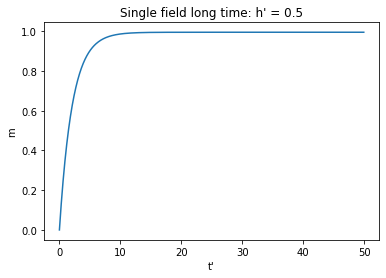

In [7]:
time_prime = np.arange(0,50,0.1)

plt.plot(time_prime,SPNC_magnetisation_sw(3,0.5,0,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Single field long time: h' = 0.5")
plt.show()

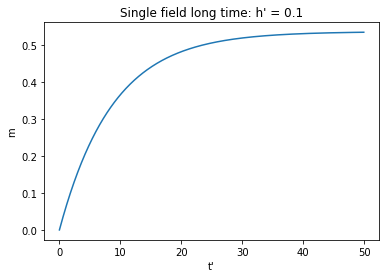

In [8]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0.1,0,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Single field long time: h' = 0.1")
plt.show()

#### Long time excitation

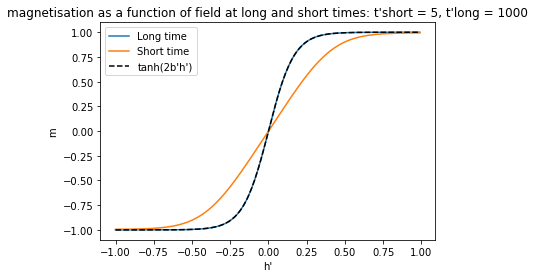

In [9]:
h_primes = np.arange(-1,1,0.01)

plt.plot(h_primes,SPNC_magnetisation_sw(3,h_primes,0,1000))
plt.plot(h_primes,SPNC_magnetisation_sw(3,h_primes,0,5))
plt.plot(h_primes,np.tanh(2*3*h_primes),'k--')
plt.xlabel("h'")
plt.ylabel('m')
plt.legend(['Long time','Short time',"tanh(2b'h')"])
plt.title("magnetisation as a function of field at long and short times: t'short = 5, t'long = 1000")
plt.show()

We can see that the output field matches exactly the expected tanh function when in the limit of long time (dotted is tanh, blue is long time, orange is short time)

### Decay from m

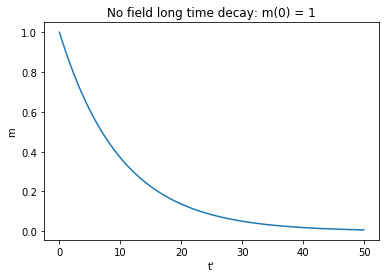

In [10]:
time_prime = np.arange(0,50,0.1)

plt.plot(time_prime,SPNC_magnetisation_sw(3,0,1,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("No field long time decay: m(0) = 1")
plt.show()

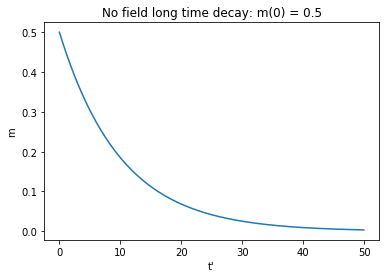

In [11]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0,0.5,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("No field long time decay: m(0) = 0.5")
plt.show()

The same decay length is seen regardless of the starting m(0) provided the applied field (here zero) is the same

#### Decay with field

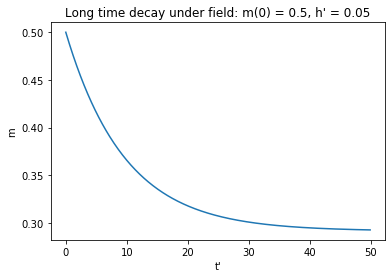

In [12]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0.05,0.5,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Long time decay under field: m(0) = 0.5, h' = 0.05")
plt.show()

#### Excitation from starting m(0)

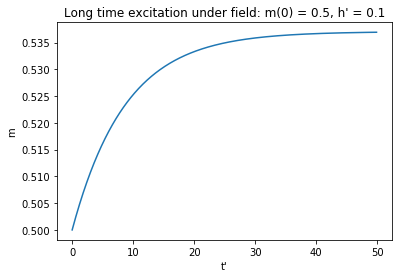

In [13]:
plt.plot(time_prime,SPNC_magnetisation_sw(3,0.1,0.5,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Long time excitation under field: m(0) = 0.5, h' = 0.1")
plt.show()

We see here that changing from $h' = 0.05$ to $h' = 0.1$ results in a change from decay down to a new value to exitation up to a new one

### Successive field inputs (memory and non-linearity)

Here we use time_prime as a time step between inputs. A combination of beta and the time step sets the "memory"

#### First let's examine the case where $0 \le h' \le 1$

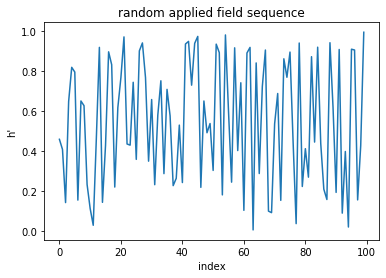

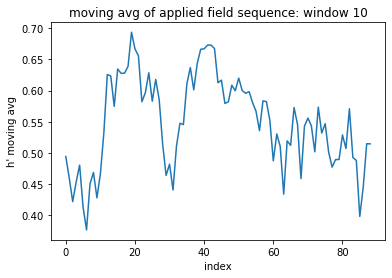

In [14]:
h_primes = np.random.rand(100)

plt.plot(h_primes)
plt.xlabel('index')
plt.ylabel("h'")
plt.title("random applied field sequence")
plt.show()

i = 0
h_avgs = []
while i < len(h_primes) - 11:
    this_window = h_primes[i:i+10]
    window_avg = sum(this_window)/10
    h_avgs.append(window_avg)
    i+=1
    
plt.plot(h_avgs)
plt.xlabel('index')
plt.ylabel("h' moving avg")
plt.title("moving avg of applied field sequence: window 10")
plt.show()

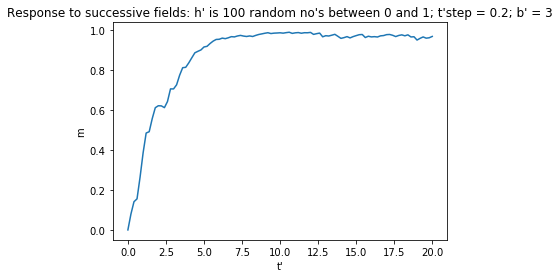

In [15]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.2)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between 0 and 1; t'step = 0.2; b' = 3")
plt.show()

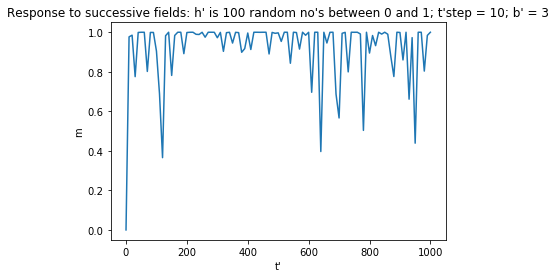

In [16]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,10)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between 0 and 1; t'step = 10; b' = 3")
plt.show()

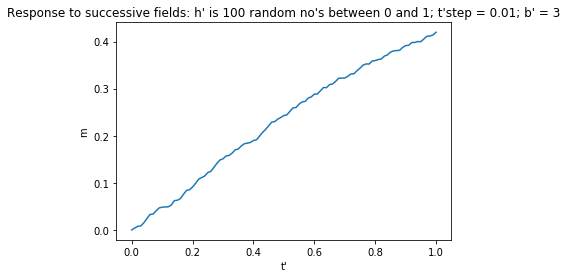

In [17]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.01)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between 0 and 1; t'step = 0.01; b' = 3")
plt.show()

We can see that we run into problems of saturating our system, so let us change our bounds on $h'$

####  $-1 \le h' \le 1$

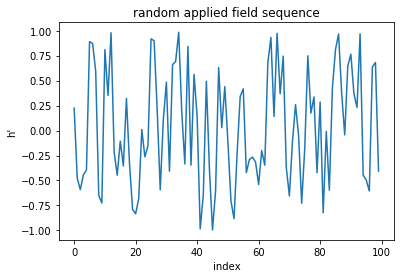

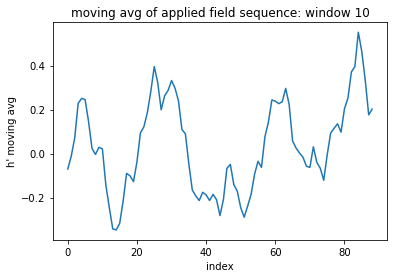

In [38]:
h_primes = 2 * np.random.rand(100) - 1

plt.plot(h_primes)
plt.xlabel('index')
plt.ylabel("h'")
plt.title("random applied field sequence")
plt.show()

i = 0
h_avgs = []
while i < len(h_primes) - 11:
    this_window = h_primes[i:i+10]
    window_avg = sum(this_window)/10
    h_avgs.append(window_avg)
    i+=1
    
plt.plot(h_avgs)
plt.xlabel('index')
plt.ylabel("h' moving avg")
plt.title("moving avg of applied field sequence: window 10")
plt.show()

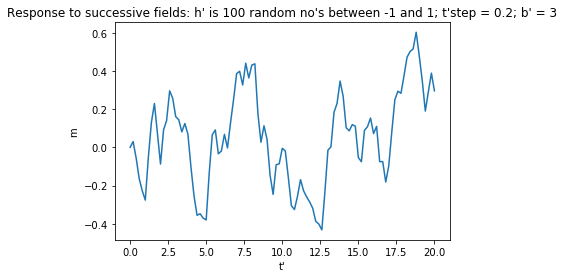

In [39]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.2)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between -1 and 1; t'step = 0.2; b' = 3")
plt.show()

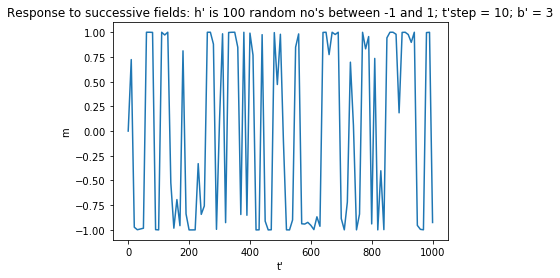

In [40]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,10)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between -1 and 1; t'step = 10; b' = 3")
plt.show()

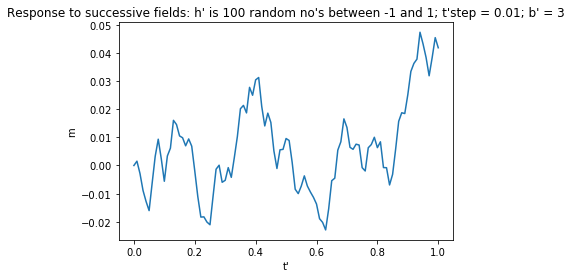

In [41]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.01)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 100 random no's between -1 and 1; t'step = 0.01; b' = 3")
plt.show()

#### Re-looking at the positive case, but $0 \le h' \le 0.25$ and longer time base

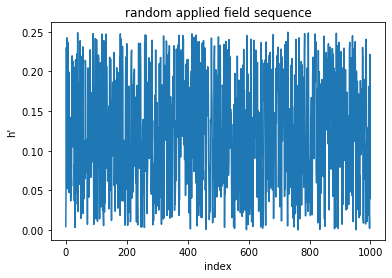

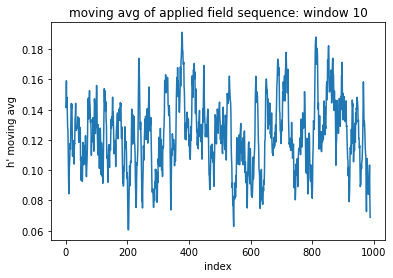

In [34]:
h_primes = np.random.rand(1000)/4

plt.plot(h_primes)
plt.xlabel('index')
plt.ylabel("h'")
plt.title("random applied field sequence")
plt.show()

i = 0
h_avgs = []
while i < len(h_primes) - 11:
    this_window = h_primes[i:i+10]
    window_avg = sum(this_window)/10
    h_avgs.append(window_avg)
    i+=1
    
plt.plot(h_avgs)
plt.xlabel('index')
plt.ylabel("h' moving avg")
plt.title("moving avg of applied field sequence: window 10")
plt.show()

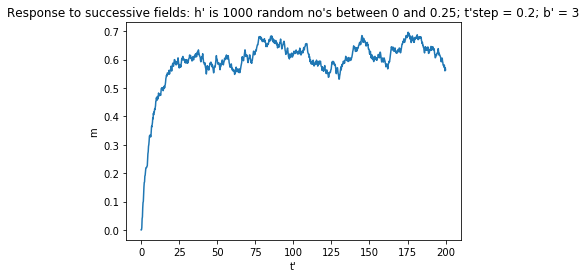

In [35]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.2)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 1000 random no's between 0 and 0.25; t'step = 0.2; b' = 3")
plt.show()

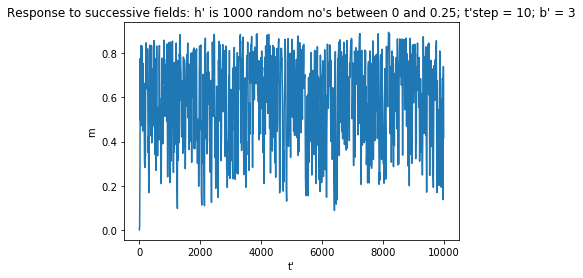

In [36]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,10)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 1000 random no's between 0 and 0.25; t'step = 10; b' = 3")
plt.show()

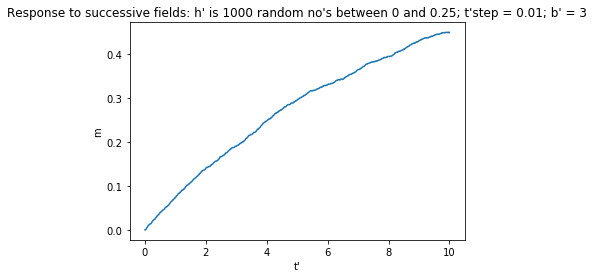

In [37]:
time, mag = SPNC_mag_evolver_sw(3,h_primes,0.01)
plt.plot(time,mag)
plt.xlabel("t'")
plt.ylabel('m')
plt.title("Response to successive fields: h' is 1000 random no's between 0 and 0.25; t'step = 0.01; b' = 3")
plt.show()

We see that the behaviour looks kind of like it is intergrating the average, with noise from the deviation. The time scale sets how much the noise effects it and how long the averaging takes. Let's take a look at this by finding the expected result from the average input:

h_prime average = 0.03603417295422498


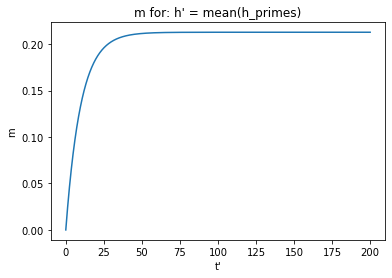

In [53]:
h_prime_avg = np.mean(h_primes)
print("h_prime average =", h_prime_avg)
total_time = 0.2 * 1000 #time step times number of points

time_prime = np.arange(0,total_time,0.1)
plt.plot(time_prime,SPNC_magnetisation_sw(3,h_prime_avg,0,time_prime))
plt.xlabel("t'")
plt.ylabel('m')
plt.title("m for: h' = mean(h_primes)")
plt.show()

Based on this, it looks a little more complicated that straight up averaging. Perhaps it is averaging over a window? 

## Looking towards machine learning

*This is based on on Matt's code for a single node dynamical resivour (originly for the Mackey-Glass equations)*

### First Matt's code:

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def Ridge_regression(S, Y, l):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \lambda |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * S = (S^T * Y  + \lambda I) * W
        W = (S^T*S + \lambda I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + l*np.eye(len(STS)))
    return np.matmul(Sdag, STY)

In [11]:
def MG_func(x, J, gamma, eta, p):
    return eta*(x + gamma*J) / (1 + np.power( x + gamma*J, p))



In [12]:
def MSE (pred, desired):
    return np.mean(np.square(np.subtract(pred,desired)))

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [14]:
def inv_sigmoid(y):
    return - np.log((1.0/y) - 1.0)

In [205]:
class Mackey_Glass_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        # theta = temporal node spacing
        theta = params['theta']
        
        # parameters for the MG function
        Sigma = np.exp(-theta)
        gamma = 0.005
        eta = 0.5
        P = 1
        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            S[k,0] = S[k-1, self.Nvirt-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,0], J[k,0], gamma, eta, P)
            for i in range(1,self.Nvirt):
                S[k,i] = S[k,i-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,i], J[k,i], gamma, eta, P)   
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

In [22]:
def NARMA10(N):
    u = np.random.random(N+50)*0.5
    y = np.zeros(N+50)
    for k in range(10,N+50):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return u[50:], y[50:]

In [23]:
Ntrain = 5000
Nvalid = 2000
Ntest = 2000

u, d = NARMA10(Ntrain + Nvalid + Ntest)

utrain = u[:Ntrain]
dtrain = d[:Ntrain]
uvalid = u[Ntrain:Ntrain+Nvalid]
dvalid = d[Ntrain:Ntrain+Nvalid]
utest = u[Ntrain+Nvalid:]
dtest = d[Ntrain+Nvalid:]

In [24]:
net = Mackey_Glass_SNR(1, 40, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'theta':0.2}
net.train(utrain, dtrain, uvalid, dvalid, params)

0.0 0.003434499025917857
0.0033992157820051604 0.1446075685762644
0.004661485743271308 0.14768592334056904
0.0063924889528206704 0.15000807246422074
0.008766285528368277 0.15174421991897968
0.012021571336618452 0.15303367702770043
0.01648567993065431 0.15398669764485487
0.02260749740328263 0.154688529850016
0.031002599892108035 0.15520401420329089
0.04251515251442982 0.15558189572385947
0.058302793946818365 0.15585851312569787
0.07995304217364506 0.15606079300154593
0.10964292652341254 0.15620860053578287
0.15035789770837651 0.15631654490548041
0.20619202825140884 0.15639534520643902
0.28275968979620314 0.15645285312527285
0.3877601032963248 0.15649481297809378
0.5317515301305706 0.15652542359439997
0.729212952525235 0.1565477521408851
1.0 0.15656403807052846
Optimal lambda =  0.0 with MSE =  0.003434499025917857


In [25]:
Stest = net.transform(utest, params)
pred = net.forward(Stest)

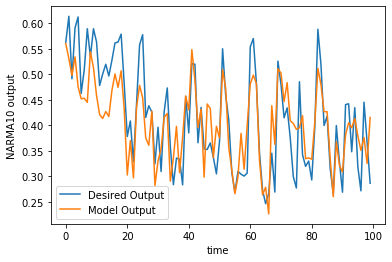

In [26]:
plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

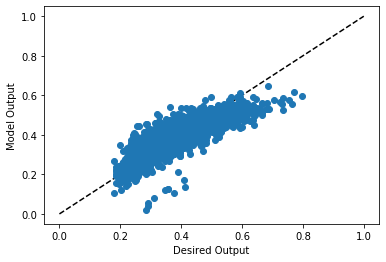

In [27]:
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

We can see it does a reasonable job of the NARMA10 task.

### Now for our case

***Need to tidy this up!***

#### Defining the net

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def Ridge_regression(S, Y, l):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \lambda |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * S = (S^T * Y  + \lambda I) * W
        W = (S^T*S + \lambda I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + l*np.eye(len(STS)))
    return np.matmul(Sdag, STY)

In [41]:
def MG_func(x, J, gamma, eta, p):
    return eta*(x + gamma*J) / (1 + np.power( x + gamma*J, p))



In [42]:
# Reduced magnetisation for two state system evolving with constant field 
# note: I am using the notation, w12: transition rate from state 1, to state 2
# w12, w21 must be constant over the tstep!
def SPNC_magnetisation_two_state(w21,w12,m0,tstep):

    wdiff = w21 - w12
    w = w12 + w21
    wratio = wdiff/w
    m = wratio + (m0 - wratio)*np.exp(-w*tstep)

    return m

In [43]:
# Stoner-wolfarth rate
    # plusminus = -1 gives rate 21, = +1 gives rate 12 
def SPNC_rate_sw(beta_prime,h_prime,minusplus):
    
    w = np.exp( -beta_prime * np.power( (1 + minusplus * h_prime) ,2) )
    
    return w

def SPNC_magnetisation_sw(beta_prime,h_prime,m0,t_prime_step):
    
    w21 = SPNC_rate_sw(beta_prime,h_prime,-1)
    w12 = SPNC_rate_sw(beta_prime,h_prime,+1)
    
    return SPNC_magnetisation_two_state(w21,w12,m0,t_prime_step)

In [44]:
def MSE (pred, desired):
    return np.mean(np.square(np.subtract(pred,desired)))

In [202]:
class SPNC_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        #Getting parameters
        # theta = temporal node spacing
        theta = params['theta']
        
        # gamma = feedback term
        gamma = params['gamma']
        
        #beta_prime = KV/KbT (effective temperature)
        beta_prime = params['beta_prime']
        
        # parameters for the MG function
        #Sigma = np.exp(-theta)
        #gamma = 0.005
        #eta = 0.5
        #P = 1
        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            # S[k,0] = S[k-1, self.Nvirt-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,0], J[k,0], gamma, eta, P)
            
            #First column is fed into from last column of previous row
            S[k,0] = SPNC_magnetisation_sw(beta_prime, (J[k,0] + gamma*S[k-1,0]) ,S[k-1,self.Nvirt-1],theta)
            
            for i in range(1,self.Nvirt):
                # S[k,i] = S[k,i-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,i], J[k,i], gamma, eta, P)   
                
                #Moving along one row feeding in the values from the last column
                S[k,i] = SPNC_magnetisation_sw(beta_prime, (J[k,i] + gamma*S[k-1,i]), S[k,i-1], theta)
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

#### Defining the task

In [68]:
def NARMA10(N):
    u = np.random.random(N+50)*0.5
    y = np.zeros(N+50)
    for k in range(10,N+50):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return u[50:], y[50:]

In [69]:
Ntrain = 5000
Nvalid = 2000
Ntest = 2000

u, d = NARMA10(Ntrain + Nvalid + Ntest)

utrain = u[:Ntrain]
dtrain = d[:Ntrain]
uvalid = u[Ntrain:Ntrain+Nvalid]
dvalid = d[Ntrain:Ntrain+Nvalid]
utest = u[Ntrain+Nvalid:]
dtest = d[Ntrain+Nvalid:]

#### Testing perfomance of different nets

*We can look at the NRMSE for some indication of performance. A shift register can't beat 0.4. Before Appeltant, 0.18 was the best. Appeltant achieves 0.15*

**No feedback: Theta = 0.2, gamma = 0, Nvirt = 40, m0 = 1, beta_prime = 3**

0.0 0.013624162930769098
0.0033992157820051604 0.017547215563656834
0.004661485743271308 0.017668529606256044
0.0063924889528206704 0.01776574053767209
0.008766285528368277 0.017843377009383696
0.012021571336618452 0.01790670145916394
0.01648567993065431 0.017961559303900202
0.02260749740328263 0.01801465067959402
0.031002599892108035 0.01807411096148035
0.04251515251442982 0.018150207271879652
0.058302793946818365 0.018255796253184062
0.07995304217364506 0.01840596004020294
0.10964292652341254 0.018616112643940537
0.15035789770837651 0.018898205587574345
0.20619202825140884 0.019255749802756128
0.28275968979620314 0.019679820555475673
0.3877601032963248 0.02014870302362423
0.5317515301305706 0.020632256750214083
0.729212952525235 0.021099247115845623
1.0 0.021524206994423093
Optimal lambda =  0.0 with MSE =  0.013624162930769098


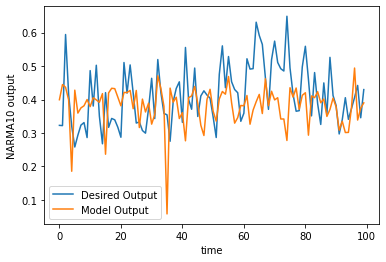

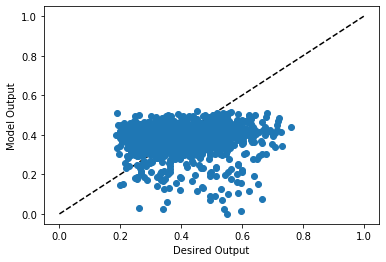

NRMSE is  0.3093045423053332


In [233]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 40, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.2,'gamma':0.0,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**Feedback: Theta = 0.3, gamma = 0.2, Nvirt = 40, m0 = 1, beta_prime = 3**

0.0 0.005913679530835317
0.0033992157820051604 0.007326563480292373
0.004661485743271308 0.007404291317518824
0.0063924889528206704 0.007473454554355842
0.008766285528368277 0.00753319855401965
0.012021571336618452 0.007584236966150693
0.01648567993065431 0.00762866852592337
0.02260749740328263 0.0076698234730140395
0.031002599892108035 0.007712181526996893
0.04251515251442982 0.007761226541070919
0.058302793946818365 0.007822982838523075
0.07995304217364506 0.007903012602071716
0.10964292652341254 0.008004935960129963
0.15035789770837651 0.00812900089171551
0.20619202825140884 0.00827152605610905
0.28275968979620314 0.008425762869754268
0.3877601032963248 0.008583952993489852
0.5317515301305706 0.008739728705023255
0.729212952525235 0.00889000885816352
1.0 0.009035996255197595
Optimal lambda =  0.0 with MSE =  0.005913679530835317


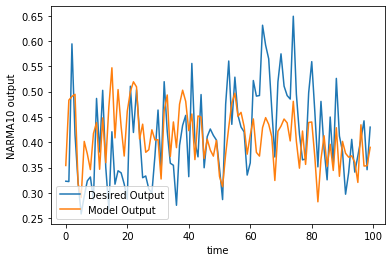

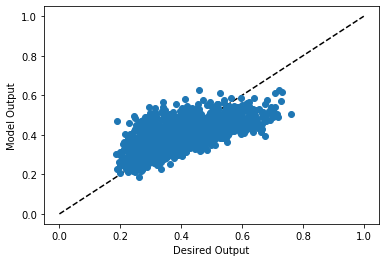

NRMSE is  0.20258055486362891


In [204]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 40, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.3,'gamma':0.2,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**More virtual nodes!: Theta = 0.3, gamma = 0.2, Nvirt = 100, m0 = 1, beta_prime = 3**

0.0 0.006628654875733119
0.0033992157820051604 0.007435575391556882
0.004661485743271308 0.007506210976880576
0.0063924889528206704 0.0075771035869126886
0.008766285528368277 0.007646673964932161
0.012021571336618452 0.007714577230007857
0.01648567993065431 0.007781676145269235
0.02260749740328263 0.007849586470422682
0.031002599892108035 0.00792006921467126
0.04251515251442982 0.007994590902022827
0.058302793946818365 0.008074246149035243
0.07995304217364506 0.008160033952320546
0.10964292652341254 0.008253321120177036
0.15035789770837651 0.008356237572193283
0.20619202825140884 0.008471688045922335
0.28275968979620314 0.008602694908473513
0.3877601032963248 0.008751065511924264
0.5317515301305706 0.008915888479495343
0.729212952525235 0.009092736775397622
1.0 0.009274243204036471
Optimal lambda =  0.0 with MSE =  0.006628654875733119


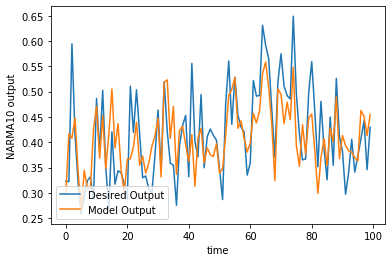

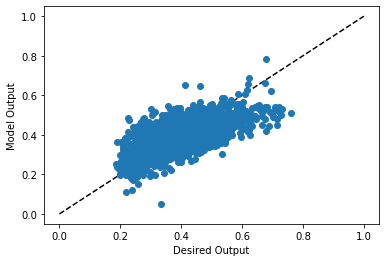

NRMSE is  0.19740381897124215


In [173]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 100, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.3,'gamma':0.2,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**As many nodes as Appeltant!: Theta = 0.3, gamma = 0.2, Nvirt = 400, m0 = 1, beta_prime = 3**

0.0 0.0036175211792119568
0.0033992157820051604 0.004289592916015298
0.004661485743271308 0.0043118653504487835
0.0063924889528206704 0.004335758539736889
0.008766285528368277 0.0043620383029319785
0.012021571336618452 0.004391374520198493
0.01648567993065431 0.004424103241660429
0.02260749740328263 0.004460115392769422
0.031002599892108035 0.00449898351209475
0.04251515251442982 0.004540286434180805
0.058302793946818365 0.004583975239574873
0.07995304217364506 0.004630622293962702
0.10964292652341254 0.004681464493549317
0.15035789770837651 0.004738207811561017
0.20619202825140884 0.004802593301613982
0.28275968979620314 0.0048757901695395105
0.3877601032963248 0.004957800959015635
0.5317515301305706 0.005047156716151713
0.729212952525235 0.005141114905059915
1.0 0.005236328427504523
Optimal lambda =  0.0 with MSE =  0.0036175211792119568


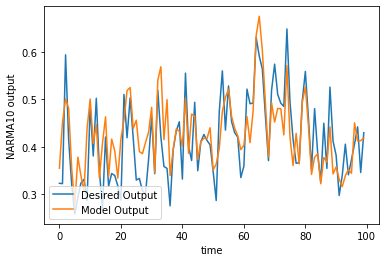

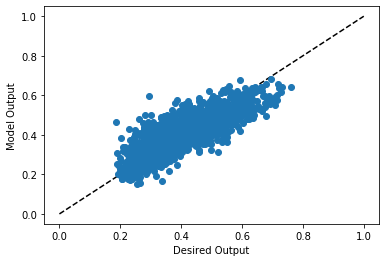

NRMSE is  0.15556650639930983


In [174]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 400, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.3,'gamma':0.2,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

*Almost the Appeltant value!!*

**Same idea, but no feedback (with tweaks): Theta = 0.7, gamma = 0.0, Nvirt = 400, m0 = 1, beta_prime = 3**

0.0 0.011229381947102912
0.0033992157820051604 0.012585928065748571
0.004661485743271308 0.012623004405361382
0.0063924889528206704 0.012655307127697227
0.008766285528368277 0.012684290759967487
0.012021571336618452 0.012712738677505785
0.01648567993065431 0.012744568120990703
0.02260749740328263 0.012784192176296618
0.031002599892108035 0.01283551823849941
0.04251515251442982 0.012900886707751082
0.058302793946818365 0.012980360073038133
0.07995304217364506 0.013071664162609534
0.10964292652341254 0.013170844095754346
0.15035789770837651 0.013273470766292315
0.20619202825140884 0.01337606314169012
0.28275968979620314 0.013477290720450074
0.3877601032963248 0.013578546189493427
0.5317515301305706 0.013683635138610277
0.729212952525235 0.013797557307417453
1.0 0.013924643295584021
Optimal lambda =  0.0 with MSE =  0.011229381947102912


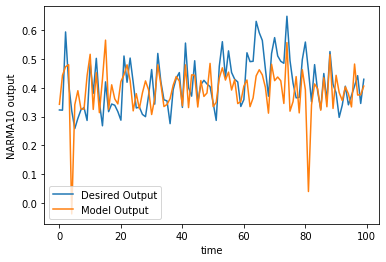

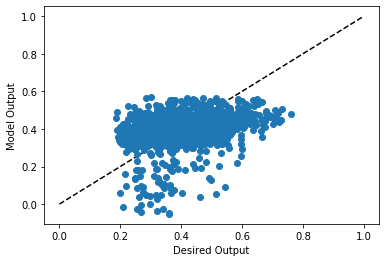

NRMSE is  0.2665067064715381


In [238]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 100, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.7,'gamma':0.0,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

Not bad, but not amazing.

***Look into it, it's not clear how exactly to calculate the NRMSE so these values can not be compared directly to the Appelton paper. Instead we will recompute using their optimum values:***

In [11]:
def MG_func(x, J, gamma, eta, p):
    return eta*(x + gamma*J) / (1 + np.power( x + gamma*J, p))



In [208]:
class Mackey_Glass_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        # theta = temporal node spacing
        theta = params['theta']
        
        # parameters for the MG function
        Sigma = np.exp(-theta)
        gamma = 0.01
        eta = 0.5
        P = 1
        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            S[k,0] = S[k-1, self.Nvirt-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,0], J[k,0], gamma, eta, P)
            for i in range(1,self.Nvirt):
                S[k,i] = S[k,i-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,i], J[k,i], gamma, eta, P)   
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

0.0 0.0027954248707648117
0.0033992157820051604 0.03583194063959803
0.004661485743271308 0.042775382671848355
0.0063924889528206704 0.051664655962892825
0.008766285528368277 0.06230428331541509
0.012021571336618452 0.07415808614891196
0.01648567993065431 0.08646267929481016
0.02260749740328263 0.09842048936196669
0.031002599892108035 0.10938042564224668
0.04251515251442982 0.11893636243438487
0.058302793946818365 0.12693201962945597
0.07995304217364506 0.13340488383179505
0.10964292652341254 0.13851109708663148
0.15035789770837651 0.14245971777280983
0.20619202825140884 0.1454672939986719
0.28275968979620314 0.14773217412226666
0.3877601032963248 0.14942334546177033
0.5317515301305706 0.15067821063137177
0.729212952525235 0.151605017411432
1.0 0.15228719442325814
Optimal lambda =  0.0 with MSE =  0.0027954248707648117


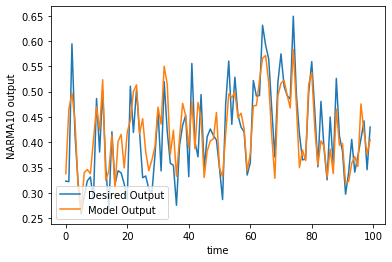

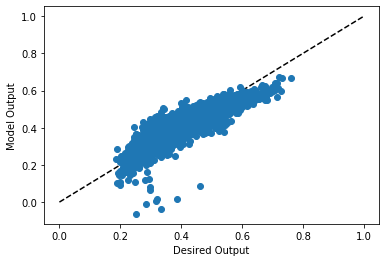

NRMSE is  0.13545287575400783
NRMSE from std dev is  0.5022000780966933


In [242]:
net = Mackey_Glass_SNR(1, 400, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'theta':0.2}
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))
print('NRMSE from std dev is ' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))

This implies that they aren't using NRMSE where the division is by standard deviation (as I thought was implied in the text) as the value is larger than they say you should get for a shift register (0.4). Not clear they are using my original one either though (they claim only 0.15)...At least this offers a comparison.

**Comparison to a shift register - not sure this is correct yet!!!**

In [223]:
def shift_func(j, s_old, gamma):
    return j + s_old*gamma



In [229]:
class shift_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        #Getting parameters
        # gamma = feedback term
        gamma = params['gamma']

        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            
            #First column is fed into from last column of previous row
            S[k,0] = shift_func(J[k,0],S[k-1,0], gamma)
            
            for i in range(1,self.Nvirt):
                #Moving along one row feeding in the values from the last column
                S[k,i] = shift_func(J[k,i],S[k-1,i],gamma)
                
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

**Just a shift register - no feedback**

0.0 0.046116060069596836
0.0033992157820051604 0.04612323399630094
0.004661485743271308 0.04612323125268176
0.0063924889528206704 0.04612322749052652
0.008766285528368277 0.046123222331679925
0.012021571336618452 0.04612321525785034
0.01648567993065431 0.04612320555863373
0.02260749740328263 0.04612319226026003
0.031002599892108035 0.046123174028585665
0.04251515251442982 0.046123149035943084
0.058302793946818365 0.04612311477985141
0.07995304217364506 0.04612306783567308
0.10964292652341254 0.04612300352053167
0.15035789770837651 0.04612291543787879
0.20619202825140884 0.046122794863402594
0.28275968979620314 0.04612262992249272
0.3877601032963248 0.046122404498995975
0.5317515301305706 0.046122096807915236
0.729212952525235 0.046121677567844875
1.0 0.046121107738300894
Optimal lambda =  0.0 with MSE =  0.046116060069596836


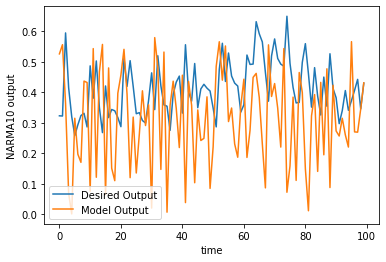

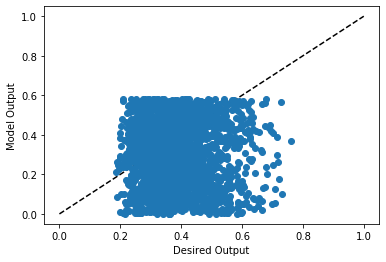

NRMSE is  0.5652499114218791
NRMSE from std dev is  2.0956996895048756


In [243]:
net = shift_SNR(1, 400, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'gamma':0.0}
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))
print('NRMSE from std dev is ' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))

**Add feedback to shift register (gamma : 0.5)**

0.0 0.017831720203766405
0.0033992157820051604 0.017777478327783588
0.004661485743271308 0.017777477084523687
0.0063924889528206704 0.017777475379465647
0.008766285528368277 0.01777747304100237
0.012021571336618452 0.01777746983429546
0.01648567993065431 0.01777746543714817
0.02260749740328263 0.01777745940744723
0.031002599892108035 0.01777745113918721
0.04251515251442982 0.017777439801588087
0.058302793946818365 0.01777742425600468
0.07995304217364506 0.017777402941365872
0.10964292652341254 0.017777373718829363
0.15035789770837651 0.01777733365800391
0.20619202825140884 0.017777278745925152
0.28275968979620314 0.01777720348969502
0.3877601032963248 0.01777710037603062
0.5317515301305706 0.01777695913807909
0.729212952525235 0.017776765764927694
1.0 0.01777650117150765
Optimal lambda =  1.0 with MSE =  0.01777650117150765


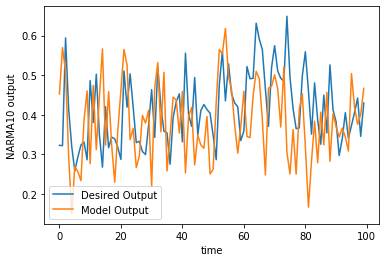

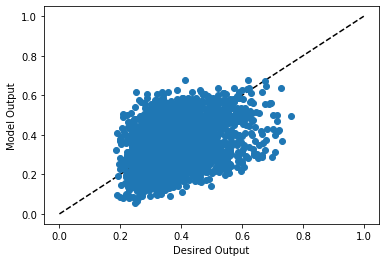

NRMSE is  0.3460463731245451
NRMSE from std dev is  1.2829887489714815


In [244]:
net = shift_SNR(1, 400, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'gamma':0.5}
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#NRMSE
print('NRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))
print('NRMSE from std dev is ' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))

Suprisingly good, although not as good as with the reservoir.